# Project Proposal

The data being used in this analysis is a collection of country-wise economic, political, social, and human freedom measurements. 135 countries are included in this data from each of the seven continents. In this analysis, the intention is to elucidate underlying patterns in the data with regard to political regime. Each country is tagged with a particular political regime of these four descriptions: closed autocracy, electoral autocracy, electoral democracy, and liberal democracy. These governmental structures range from largely authoritarian to largely democratic. It is of interest to identify how factors that are essential to human freedom manifest in each of these political regimes. In the Western World, we assume that liberal democracy leads to maximal human freedom. This conception can be evaluated through clustering. The goal is to cluster the feature data in order to see if the indicators are highly variant between these regimes. Simply put, are the freedom indicators truly different between political regimes? The clustering analysis will aim to answer this query. 

In order to execute this analysis, the Sci-kit learn package for the Python programming langage will be used. Visualizations will be created with the Matplotlib package for Python as well. The analysis techniques included will be Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). The dimension reduction techniques are aimed to identify underlying patterns in the data structure for each countries. The analysis will allow us to vizualize the dataset in three dimensions - the x axis, the y axis, and color. The color will be aligned with the political regime of each respectvie country. Through these techniques, we aim to identify patterns between political regimes based on the information contained in the feature data set in a visually meaningful two dimensional plot.

# Code Implementation

## Data and Package Import


In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv('C:\\Users\\erinb\\OneDrive\\Documents\\Georgetown\\DSAN 5000\\dsan-5000-project-ebevec\\data\\01-modified-data\\data_clean2.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Unnamed: 0', 'Country', 'GDP_2019', 'GDP_2020', 'pop_2019', 'pop_2020',
       'unemployment_2019', 'unemployment_2020', 'hf_score_2019',
       'hf_rank_2019', 'pf_religion_2019', 'pf_expression_2019',
       'ef_score_2019', 'pf_ss_2019', 'hf_score_2020', 'hf_rank_2020',
       'pf_religion_2020', 'pf_expression_2020', 'ef_score_2020', 'pf_ss_2020',
       'Year', 'Learning.Adjusted.Years.of.School', 'regime_2019',
       'regime_2020'],
      dtype='object')
(135, 24)


,Unnamed: 0,Country,GDP_2019,GDP_2020,pop_2019,pop_2020,unemployment_2019,unemployment_2020,hf_score_2019,hf_rank_2019,...,hf_score_2020,hf_rank_2020,pf_religion_2020,pf_expression_2020,ef_score_2020,pf_ss_2020,Year,Learning.Adjusted.Years.of.School,regime_2019,regime_2020
0,1,Albania,NaN,"1,644.08",2.881,2.878,11.470,11.675,8.07,42,...,7.67,47,9.757500,6.106867,7.64,9.249726,2020,8.953018,electoral autocracy,electoral autocracy
1,2,Algeria,NaN,"18,476.90",43.424,43.851,11.383,NaN,5.08,155,...,5.13,154,5.417292,4.395414,5.12,8.840074,2020,7.091553,electoral autocracy,electoral autocracy
2,3,Angola,NaN,"33,041.00",32.354,33.428,NaN,NaN,5.96,127,...,5.97,122,6.746042,5.597544,5.91,8.473782,2020,4.234978,electoral autocracy,electoral autocracy
3,4,Argentina,NaN,"27,481.44",44.939,45.388,9.825,11.550,7.33,75,...,6.99,74,9.873750,8.389844,4.87,8.504898,2020,8.411310,electoral democracy,electoral democracy
4,5,Armenia,NaN,"6,181.90",2.963,2.962,18.300,18.200,8.32,34,...,8.14,26,8.389792,7.580944,7.84,9.395818,2020,7.994621,electoral democracy,electoral democracy


In [118]:
# Light data cleaning
df = df.replace(",", "", regex = True)

## Principal Component Analysis


In [119]:
# Drop all categorical variables
df_numeric = df.iloc[:, 2:20]
print(df_numeric.shape)

df_numeric = df_numeric.apply(pd.to_numeric)
df_numeric = pd.DataFrame(df_numeric)

#  Establish target (regime_2020)
df_target = df.iloc[:, 23]

df_numeric.head()

(135, 18)


,GDP_2019,GDP_2020,pop_2019,pop_2020,unemployment_2019,unemployment_2020,hf_score_2019,hf_rank_2019,pf_religion_2019,pf_expression_2019,ef_score_2019,pf_ss_2019,hf_score_2020,hf_rank_2020,pf_religion_2020,pf_expression_2020,ef_score_2020,pf_ss_2020
0,NaN,1644.08,2.881,2.878,11.470,11.675,8.07,42,9.737500,6.248600,7.79,9.350083,7.67,47,9.757500,6.106867,7.64,9.249726
1,NaN,18476.90,43.424,43.851,11.383,NaN,5.08,155,5.236667,4.586654,4.86,8.952936,5.13,154,5.417292,4.395414,5.12,8.840074
2,NaN,33041.00,32.354,33.428,NaN,NaN,5.96,127,6.736667,5.500711,5.55,8.463164,5.97,122,6.746042,5.597544,5.91,8.473782
3,NaN,27481.44,44.939,45.388,9.825,11.550,7.33,75,9.859375,8.205444,5.44,8.404363,6.99,74,9.873750,8.389844,4.87,8.504898
4,NaN,6181.90,2.963,2.962,18.300,18.200,8.32,34,8.338542,7.617444,7.98,9.264917,8.14,26,8.389792,7.580944,7.84,9.395818


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [121]:
df_numeric.isna().sum()

GDP_2019              78
GDP_2020               0
pop_2019               2
pop_2020               0
unemployment_2019     50
unemployment_2020     51
hf_score_2019          0
hf_rank_2019           0
pf_religion_2019       0
pf_expression_2019     0
ef_score_2019          0
pf_ss_2019             0
hf_score_2020          0
hf_rank_2020           0
pf_religion_2020       0
pf_expression_2020     0
ef_score_2020          0
pf_ss_2020             0
dtype: int64

In [122]:
# Linear Interpolation
full_df = df_numeric.dropna()

# GDP
delta = full_df['GDP_2020'] - full_df['GDP_2019']
delta = delta.mean()

df_numeric['GDP_2020'] = df_numeric['GDP_2020'].fillna(df_numeric['GDP_2019'] + delta)
df_numeric['GDP_2019'] = df_numeric['GDP_2019'].fillna(df_numeric['GDP_2020'] - delta)
df_numeric.head()

# Population 
delta2 = full_df['pop_2020'] - full_df['pop_2019']
delta2 = delta2.mean()

df_numeric['pop_2020'] = df_numeric['pop_2020'].fillna(df_numeric['pop_2019'] + delta)
df_numeric['pop_2019'] = df_numeric['pop_2019'].fillna(df_numeric['pop_2020'] - delta)
df_numeric.head()

# Unemployment - Too many NaN for interpolation. Dropping columns. Imputation unreasonable for country-wise comparion.
df_numeric = df_numeric.drop(columns = ['unemployment_2019', 'unemployment_2020'])

df_numeric.isna().sum()

GDP_2019              0
GDP_2020              0
pop_2019              0
pop_2020              0
hf_score_2019         0
hf_rank_2019          0
pf_religion_2019      0
pf_expression_2019    0
ef_score_2019         0
pf_ss_2019            0
hf_score_2020         0
hf_rank_2020          0
pf_religion_2020      0
pf_expression_2020    0
ef_score_2020         0
pf_ss_2020            0
dtype: int64

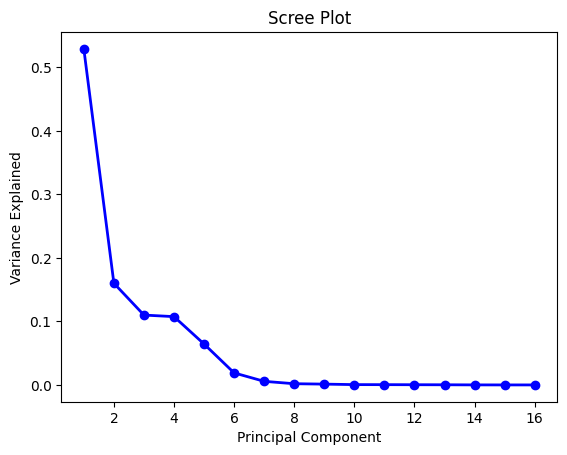

In [123]:
# Standardize Data
df_numeric = StandardScaler().fit_transform(df_numeric)

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components=16
pca = PCA(n_components=n_components)
pca_fit=pca.fit_transform(df_numeric)

# Scree plot to determine optimal number of components
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

C:\Users\erinb\AppData\Local\Temp\ipykernel_13504\2745637745.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_fit[:,0], pca_fit[:,1], c = cvec, cmap='tab10')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


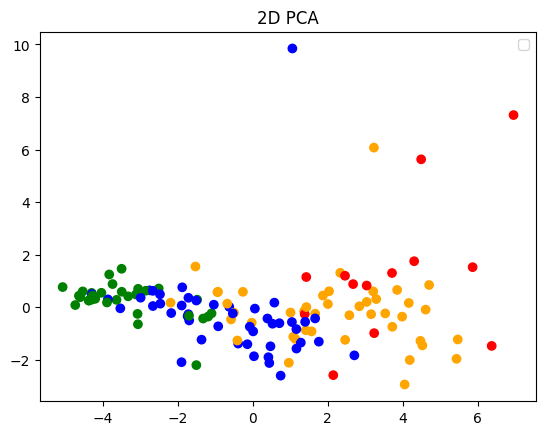

In [124]:
label_color_dict = {'closed autocracy':'red','electoral autocracy':'orange','electoral democracy':'blue','liberal democracy':'green'}

# Color vector creation
cvec = [label_color_dict[label] for label in df_target]

plt.scatter(pca_fit[:,0], pca_fit[:,1], c = cvec, cmap='tab10')
plt.title('2D PCA')
plt.legend()
plt.show()

## t-SNE


In [125]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.manifold import TSNE

RESULTS
shape :  (135, 2)
First few points : 
 [[-0.3899381 -7.085682 ]
 [ 2.8453915  4.308098 ]]


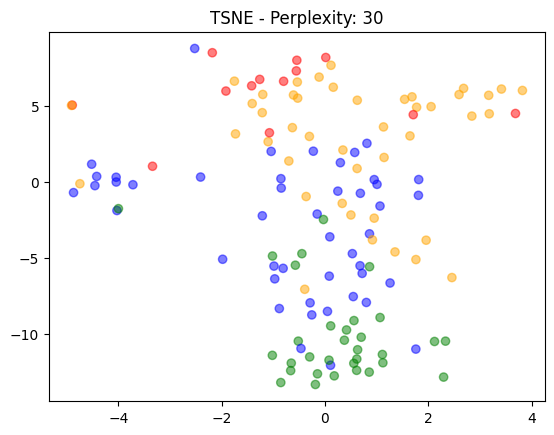

In [126]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(df_numeric)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = cvec, alpha=0.5)
plt.title('TSNE - Perplexity: 30')
plt.show()

In [127]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(df_numeric)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = cvec, alpha=0.5)
plt.title('TSNE - Perplexity: 50')
plt.show()

KeyboardInterrupt: 

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=5).fit_transform(df_numeric)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = cvec, alpha=0.5)
plt.title('TSNE - Perplexity: 5')
plt.show()

# Project Report

__Evaluation and Comparison of PCA and t-SNE__ 

PCA and t-SNE are both dimension reduction techniques that are used to visualize and evaluate multidimensional datasets in lower dimension while retaining as much information as possible. The primary difference between these two algorithms is how they choose to retain the information. PCA priortizes the variance amongst the data, whereas t-SNE priotizies the pairwise similarities of observations. More generally, PCA retains the global relationships and t-SNE retained the local relationships. t-SNE uses the KL divergence to reduce which allows for the local relationships to be preserved.

One advantage of PCA is that it is less computationally expensive than t-SNE. So, with more data or limited resources, PCA may be prefferential. It would also be preffered when analyzing data of which you care more about the global relationships between observations. PCA also does not require hyperparameter selection such as perplexity, so it may be less subject to bias. t-SNE usually performs better than PCA and is insensitive to outliers. With data with high outliers, t-SNE is prefferential. 

In terms of visualization, t-SNE is generally better than PCA. This is because it retains local structure, so clusters and patterns are easier to identify through graphical visualizaitons generated by t-SNE. It also allows you to generate many different visualizations by toggling the perplexity hyperparameter which is very useful with complex, high dimensional data visualization. 

__Methods__

First, PCA was conducted on the feature dataset. The numeric features of the dataset were preprocessed for PCA. PCA was conducted on the data, and a scree plot was generated in order to determine the optimal number of components for the analysis. The plot indicates that most of the variance of the dataset is described in 4 or 5 dimensions. Next, the PCA was visualized in three dimensions - x, y, and color. Each color represents a different political regime. 

Next, t-SNE was conducted on the feature dataset. The dataset was embedded with the t-SNE algorithm, then visualized at different perplexities. The perplexities selected were 5, 30, and 50. This provided different representations of the local relationships between data points. The graphics for both PCA and t-SNE were inspected and evaluated visually. 

__Results__

The PCA revealed somewhat defined clusters among each political regime. However, in 2-dimesnions, the datapoints are majorly in one cluster indicated low difference between each country and, more broadly, political regime. 

The t-SNE analysis revelaed somewhat defined clusters as well. These clusters were slgihtly more defined than in the PCA analysis. The cluster separations of political regime are observable at each perplexity level. The separation between clusters of political regime are best observed at perplexity of 30. 

The PCA and t-SNE analyses had similar results, with some clustering based on political regime in the two dimensional space. The clusters, alghough not well defined, are aparent in both cases.

__Conclusions__

The PCA and t-SNE analyses both produced visualizations that showed mild but definite clustering among political regimes when the data is represented in two-dimensional space. This indicates that these regimes are somewhat different on the basis of economic, political, and human freedom. 
